In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.utils import np_utils

In [2]:
x = np.load('pixels.npy')
y = np.load('labels.npy')

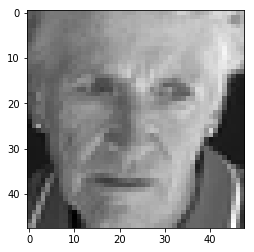

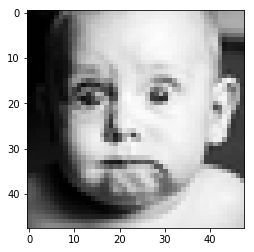

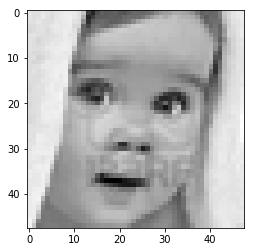

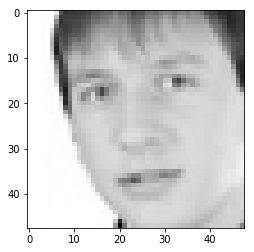

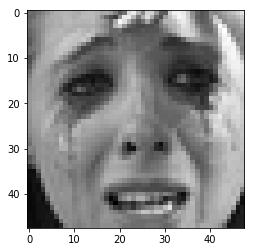

In [5]:
for ix in range(50,55):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [6]:
x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

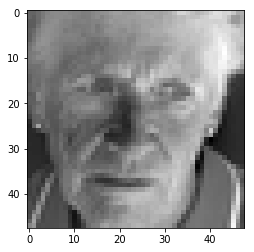

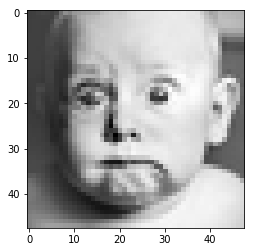

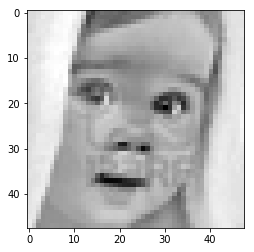

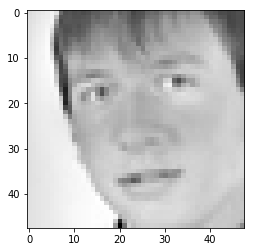

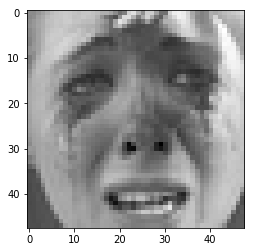

In [7]:
for ix in range(50,55):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [18]:
from keras.utils import to_categorical
y_hot = to_categorical(y, num_classes=10)
y_hot.shape

(35887, 10)

In [19]:
X_train = x[0:28710,:]
Y_train = y_hot[0:28710]
print (X_train.shape , Y_train.shape)
X_crossval = x[28710:32300,:]
Y_crossval = y_hot[28710:32300]
print (X_crossval.shape , Y_crossval.shape)
X_test = x[32300:,:]
Y_test = y_hot[32300:]
print (X_test.shape , Y_test.shape)

(28710, 2304) (28710, 10)
(3590, 2304) (3590, 10)
(3587, 2304) (3587, 10)


In [21]:
X_train = X_train.reshape((-1, 48, 48, 1))
X_crossval = X_crossval.reshape((-1, 48, 48, 1))
X_test = X_test.reshape((-1,48,48,1))

In [28]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Valid', 
                 activation ='relu', input_shape = (48,48,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 64)        36928     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 64)        36928     
__________

In [31]:
hist = model.fit(X_train, Y_train,
         nb_epoch=5,
         shuffle=True,
         batch_size=64,
         validation_data=(X_crossval, Y_crossval))

c:\users\mayan\appdata\local\programs\python\python36\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 28710 samples, validate on 3590 samples
Epoch 1/5
28710/28710 [==============================] - 1722s 60ms/step - loss: 1.6679 - acc: 0.3462 - val_loss: 1.4285 - val_acc: 0.4588
Epoch 2/5
28710/28710 [==============================] - 1653s 58ms/step - loss: 1.4159 - acc: 0.4563 - val_loss: 1.3150 - val_acc: 0.5000
Epoch 3/5
28710/28710 [==============================] - 1628s 57ms/step - loss: 1.2960 - acc: 0.5060 - val_loss: 1.2472 - val_acc: 0.5242
Epoch 4/5
28710/28710 [==============================] - 1618s 56ms/step - loss: 1.2176 - acc: 0.5381 - val_loss: 1.1838 - val_acc: 0.5510
Epoch 5/5
28710/28710 [==============================] - 1614s 56ms/step - loss: 1.1447 - acc: 0.5665 - val_loss: 1.1785 - val_acc: 0.5485
